# Tarea 4. Procesamiento de imágenes


**Pasos del código:**
1. Cargar la imagen localmente.
2. Convertir la imagen a escala de grises.
3. Aplicar desenfoque para reducir ruido.
4. Detectar círculos usando cv2.HoughCircles.
5. Dibujar los círculos y sus centros en la imagen.
6. Mostrar la imagen procesada con matplotlib.


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


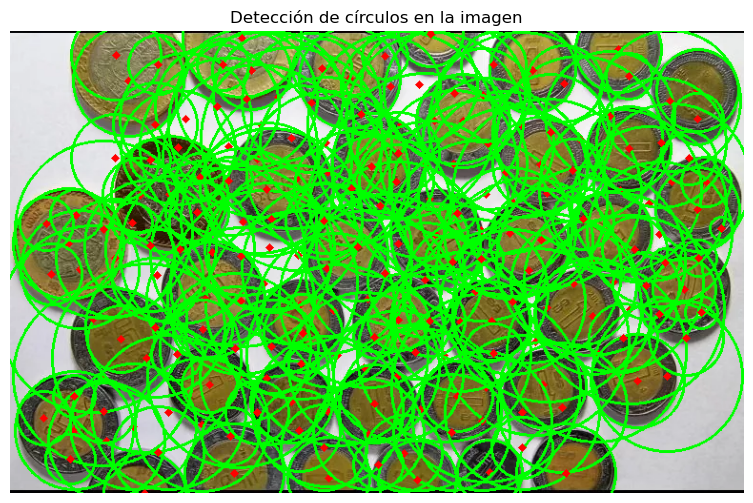

In [3]:
# 📌 1. Cargar la imagen localmente
image_path = "imagen_2.jpg"  
img = cv2.imread(image_path)

# Verificar si la imagen se cargó correctamente
if img is None:
    print("Error: No se pudo cargar la imagen. Verifica la ruta.")
else:
    # 📌 2. Convertir la imagen a escala de grises
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 📌 3. Aplicar desenfoque para reducir ruido
    gray_blurred = cv2.GaussianBlur(gray, (9, 9), 2)

    # 📌 4. Detectar círculos en la imagen con la Transformada de Hough
    circles = cv2.HoughCircles(
        gray_blurred, cv2.HOUGH_GRADIENT, dp = 1.2, minDist = 30,
        param1 = 50, param2 = 30, minRadius = 10, maxRadius = 100
    )

    # 📌 5. Dibujar los círculos detectados
    output = img.copy()
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            # Dibujar el contorno del círculo (verde)
            cv2.circle(output, (i[0], i[1]), i[2], (0, 255, 0), 2)
            # Dibujar el centro del círculo (rojo)
            cv2.circle(output, (i[0], i[1]), 2, (0, 0, 255), 3)

    # 📌 6. Convertir la imagen a RGB para mostrar con Matplotlib
    output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

    # Mostrar la imagen con los círculos detectados
    plt.figure(figsize=(10, 6))
    plt.imshow(output_rgb)
    plt.axis("off")
    plt.title("Detección de círculos en la imagen")
    plt.show()


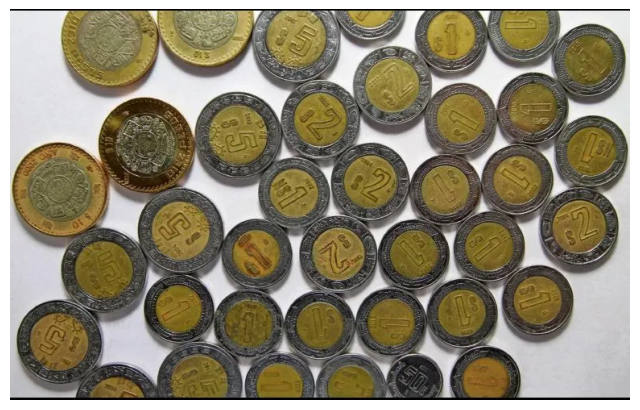

In [4]:
# Convertir de BGR a RGB para mostrar correctamente con Matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Mostrar la imagen
plt.figure(figsize = (8, 6))  # Ajustar el tamaño de la figura
plt.imshow(img_rgb)           # Mostrar en formato RGB
plt.axis('off')               # Ocultar ejes
plt.show()

## Detercción de bordes

### Escala de grises

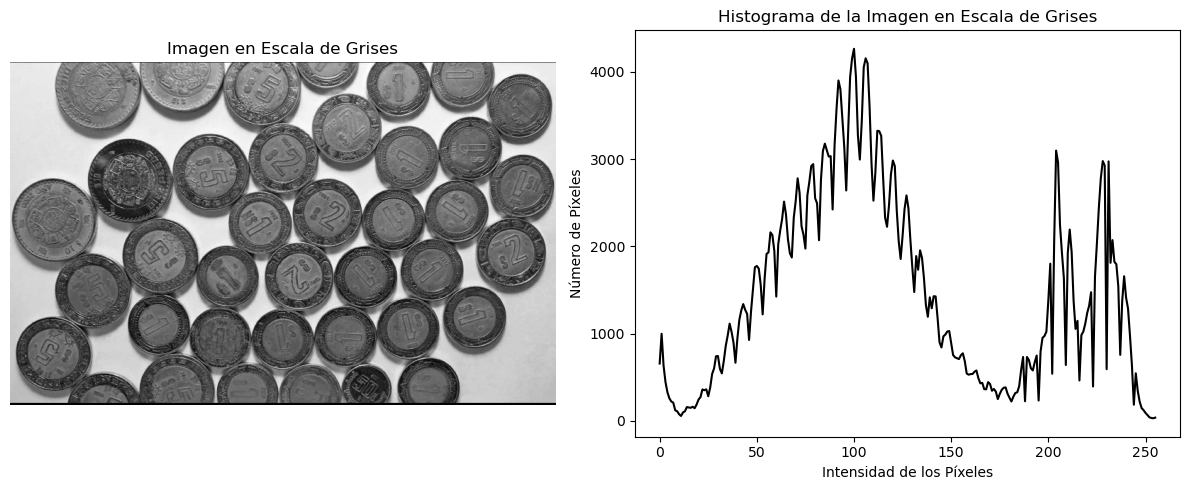

In [7]:
# Convertir la imagen a escala de grises
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Oscurecer la imagen dividiéndola por un valor alto (ajustable)
dark_image = (gray / 2).astype(np.uint8)
 
# Calcular el histograma para la imagen en escala de grises
hist_gray = cv2.calcHist([gray], [0], None, [256], [0, 256])

# Visualizar la imagen en escala de grises y su histograma
plt.figure(figsize = (12, 5))

plt.subplot(121)
plt.imshow(dark_image, cmap = 'gray')
plt.title('Imagen en Escala de Grises')
plt.axis('off')

plt.subplot(122)
plt.plot(hist_gray, color = 'black')
plt.title('Histograma de la Imagen en Escala de Grises')
plt.xlabel('Intensidad de los Píxeles')
plt.ylabel('Número de Píxeles')

plt.tight_layout()
plt.show()

### Ruido

(array([59., 42., 33., 21., 33., 21., 20., 14.,  5.,  8.]),
 array([  31.        ,  454.29998779,  877.59997559, 1300.90002441,
        1724.19995117, 2147.5       , 2570.80004883, 2994.10009766,
        3417.39990234, 3840.69995117, 4264.        ]),
 <BarContainer object of 10 artists>)

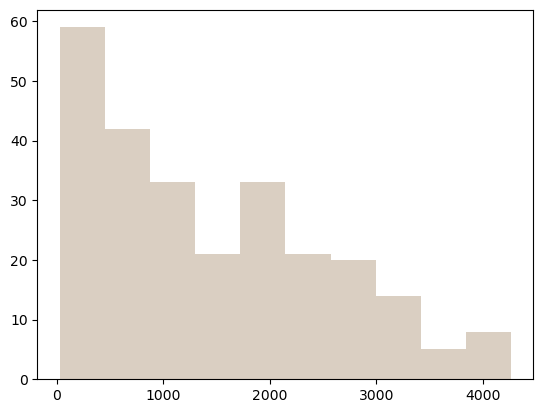

In [9]:
# Aplicar desenfoque Gaussiano
blurred = cv2.GaussianBlur(gray, (11, 11), 0)
hist_blurred = cv2.calcHist([gray], [0], None, [256], [0, 256])

plt.show()
plt.hist(hist_gray, alpha = 0.2)
plt.hist(hist_blurred, alpha = 0.2)

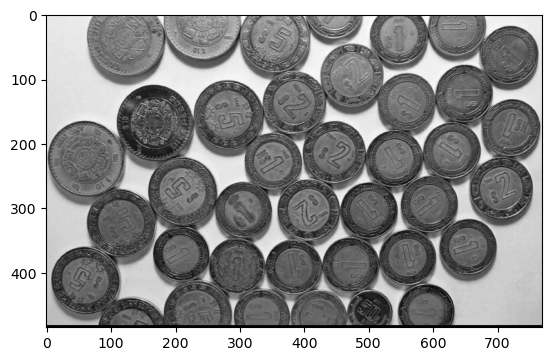

In [10]:
# Mostrar la imagen usando matplotlib
plt.imshow(gray, cmap = 'gray')
plt.show()

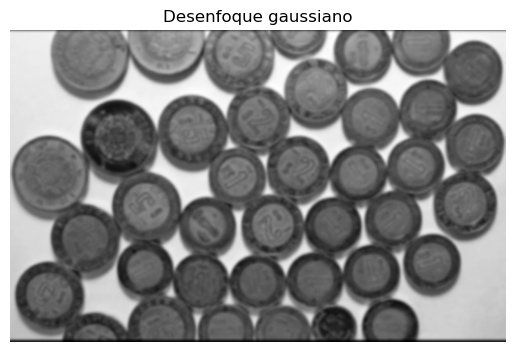

In [11]:
plt.imshow(blurred, cmap = 'gray')
plt.title('Desenfoque gaussiano')
plt.axis('off')
plt.show()

### Bordes

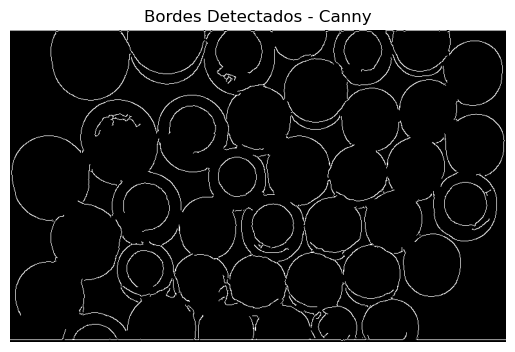

In [13]:
# Detectar bordes usando el detector de Canny
edges = cv2.Canny(blurred, 30, 150)

plt.imshow(edges, cmap = 'gray')
plt.title('Bordes Detectados - Canny')
plt.axis('off')
plt.show()

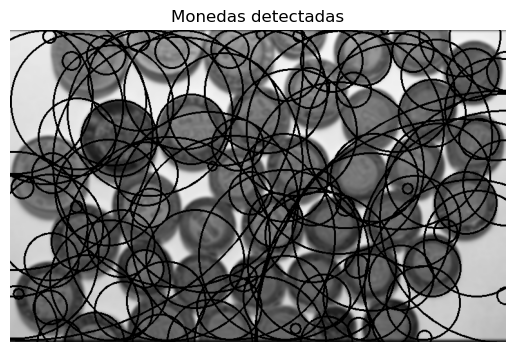

In [14]:
img_circles = blurred.copy()
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp = 1.5, minDist = 50,
                           param1 = 10, param2 = 5, minRadius = 0, maxRadius = 0)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(img_circles,(i[0],i[1]),i[2],(0,255,0),2)

# Mostrar la imagen original con los círculos detectados
plt.imshow(cv2.cvtColor(img_circles, cv2.COLOR_BGR2RGB))
plt.title('Monedas detectadas')
plt.axis('off')
plt.show()